In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
# http://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf

# Denoising Autoencoder Pre-training

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [8]:
from src.RBM import RBM, get_x, sample

In [9]:
mnist = np.load("../hw1/data/mnist_28x28_train-test-cv.npz")


In [10]:
train_x = get_x(mnist["train"])
cv_x = get_x(mnist["cv"])
test_x = get_x(mnist["test"])

In [92]:
def plot_results(rbm, test_x, img_size = 28):
    plt.figure(figsize=(16, 5))

    gs = gridspec.GridSpec(3, 5, wspace=0.0, hspace=0.0)
    ax = plt.subplot(gs[:2, :2])
    ax.plot(range(len(rbm.scores)), rbm.scores);
    
    test_sample = test_x[np.random.randint(0, 1000)]

    for i in range(3):
        
        
        ax = plt.subplot(gs[0, 2 + i]);ax.set_xticks([]);ax.set_yticks([]);
        vis = (rbm.visible_step(rbm.hidden_step(test_sample)))
        ax.imshow(sample(vis).reshape((img_size,img_size)), cmap="gray")
        
        ax = plt.subplot(gs[1, 2 + i]);ax.set_xticks([]);ax.set_yticks([]);
        vis = (rbm.visible_step(rbm.hidden_step(test_sample)))
        ax.imshow((vis).reshape((img_size,img_size)), cmap="gray")
        
        ax = plt.subplot(gs[2, 2 + i]);ax.set_xticks([]);ax.set_yticks([]);
        ax.imshow((test_sample).reshape((img_size,img_size)), cmap="gray")

# Experiment 1

In [44]:
params1 = {
    "size": (28*28, 1024),
    "eta": 0.008,
    "batch_size": 40,
    "epochs": 1500,
    "momentum": 0.9
}

rbm1 = RBM(**params1)
rbm1.fit(train_x, cv_x)

0 / 1500 | 11.9794330717

KeyboardInterrupt: 

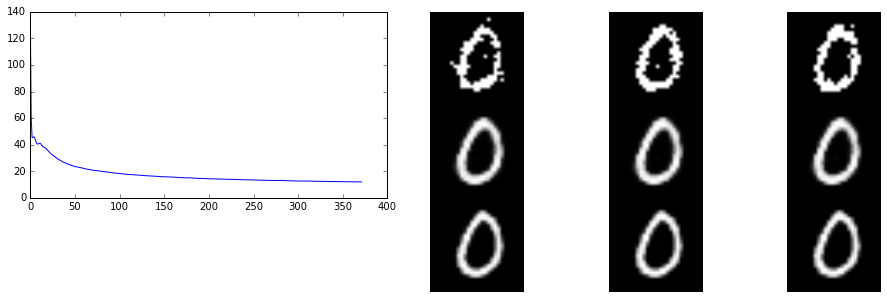

In [94]:
plot_results(rbm1, test_x)

In [51]:
# np.savez("./models/rbm_784x1024", w=rbm1.w, a=rbm1.a, b=rbm1.b)

# Experiment 2

In [20]:
params2 = {
    "size": (28*28, 600),
    "eta": 0.008,
    "batch_size": 40,
    "epochs": 1500,
    "momentum": 0.9
}

rbm2 = RBM(**params2)
rbm2.fit(train_x, cv_x)

0 / 1500 | 12.0050202924

KeyboardInterrupt: 

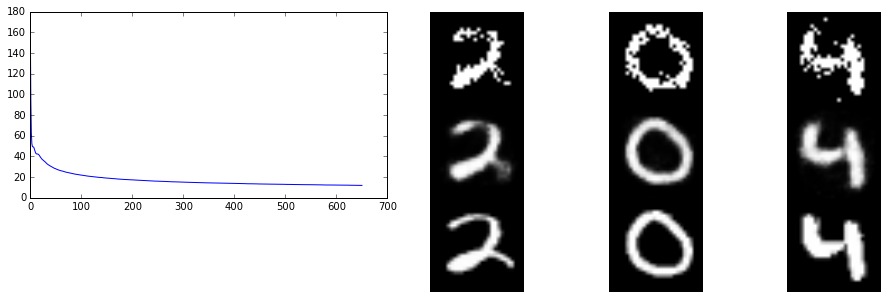

In [21]:
plot_results(rbm2, test_x)

In [48]:
h_1024_train_x = np.array(map(lambda x: rbm1.hidden_step(x), train_x))
h_1024_cv_x = np.array(map(lambda x: rbm1.hidden_step(x), cv_x))
h_1024_test_x = np.array(map(lambda x: rbm1.hidden_step(x), test_x))

In [49]:
params3 = {
    "size": (2**10, 2**9),
    "eta": 0.008,
    "batch_size": 40,
    "epochs": 1500,
    "momentum": 0.9
}

rbm3 = RBM(**params3)
rbm3.fit(h_1024_train_x, h_1024_cv_x)

0 / 1500 | 16.4175791524

KeyboardInterrupt: 

In [53]:
# np.savez("./models/rbm_1024x512", w=rbm3.w, a=rbm3.a, b=rbm3.b)

In [54]:
h_512_train_x = np.array(map(lambda x: rbm3.hidden_step(x), h_1024_train_x))
h_512_cv_x = np.array(map(lambda x: rbm3.hidden_step(x), h_1024_cv_x))
h_512_test_x = np.array(map(lambda x: rbm3.hidden_step(x), h_1024_test_x))

In [62]:
params4 = {
    "size": (2**9, 2**7),
    "eta": 0.008,
    "batch_size": 40,
    "epochs": 1500,
    "momentum": 0.9
}

rbm4 = RBM(**params4)
rbm4.fit(h_512_train_x, h_512_cv_x)

0 / 1500 | 6.75309633929

KeyboardInterrupt: 

In [63]:
np.savez("./models/rbm_512x128", w=rbm4.w, a=rbm4.a, b=rbm4.b)

In [64]:
h_128_train_x = np.array(map(lambda x: rbm4.hidden_step(x), h_512_train_x))
h_128_cv_x = np.array(map(lambda x: rbm4.hidden_step(x), h_512_cv_x))
h_128_test_x = np.array(map(lambda x: rbm4.hidden_step(x), h_512_test_x))

In [69]:
params5 = {
    "size": (2**7, 2**5),
    "eta": 0.1,
    "batch_size": 40,
    "epochs": 1500,
    "momentum": 0.9
}

rbm5 = RBM(**params5)
rbm5.fit(h_128_train_x, h_128_cv_x)

1 / 1500 | 4.86126373264

KeyboardInterrupt: 

In [70]:
np.savez("./models/rbm_128x32", w=rbm5.w, a=rbm5.a, b=rbm5.b)

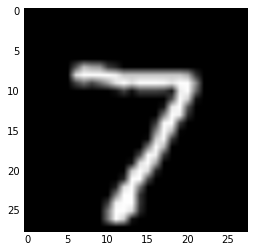

In [99]:
plt.imshow(test_x[0].reshape((28,28)), cmap="gray")

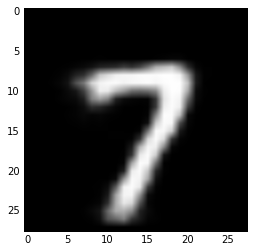

In [100]:
bottle_neck = rbm5.hidden_step(rbm4.hidden_step(rbm3.hidden_step(rbm1.hidden_step(test_x[0]))))
result = rbm1.visible_step(rbm3.visible_step(rbm4.visible_step(rbm5.visible_step(bottle_neck))))
plt.imshow(result.reshape((28,28)), cmap="gray")